# Reference for original source code
https://github.com/CatalystCode/Custom-Vison-Service/blob/master/FoodClassification/Scripts/evalWebServiceHierarchy.py

In [1]:
import random, os
import time
import requests
import pandas as pd
import numpy as np
from IPython.display import Image, display
import json

# TODO: CHANGE ME!!
endpoint = "https://southcentralus.api.cognitive.microsoft.com/customvision/v2.0/Prediction/e96d01c2-e320-48c9-b85e-0fa01890e426/image?iterationId=bdb4dfa1-4921-41a8-b8ce-e6ac2e916d98"
key = '4e88879f828247029ed8fbe2fc805da3'

# Part I
Test one random image.

## 1.1 get random image path and show

img1BhsopVqgQgZ.jpg
exttestset/008.ข้าวหมูกระเทียมพริกไทย/img1BhsopVqgQgZ.jpg


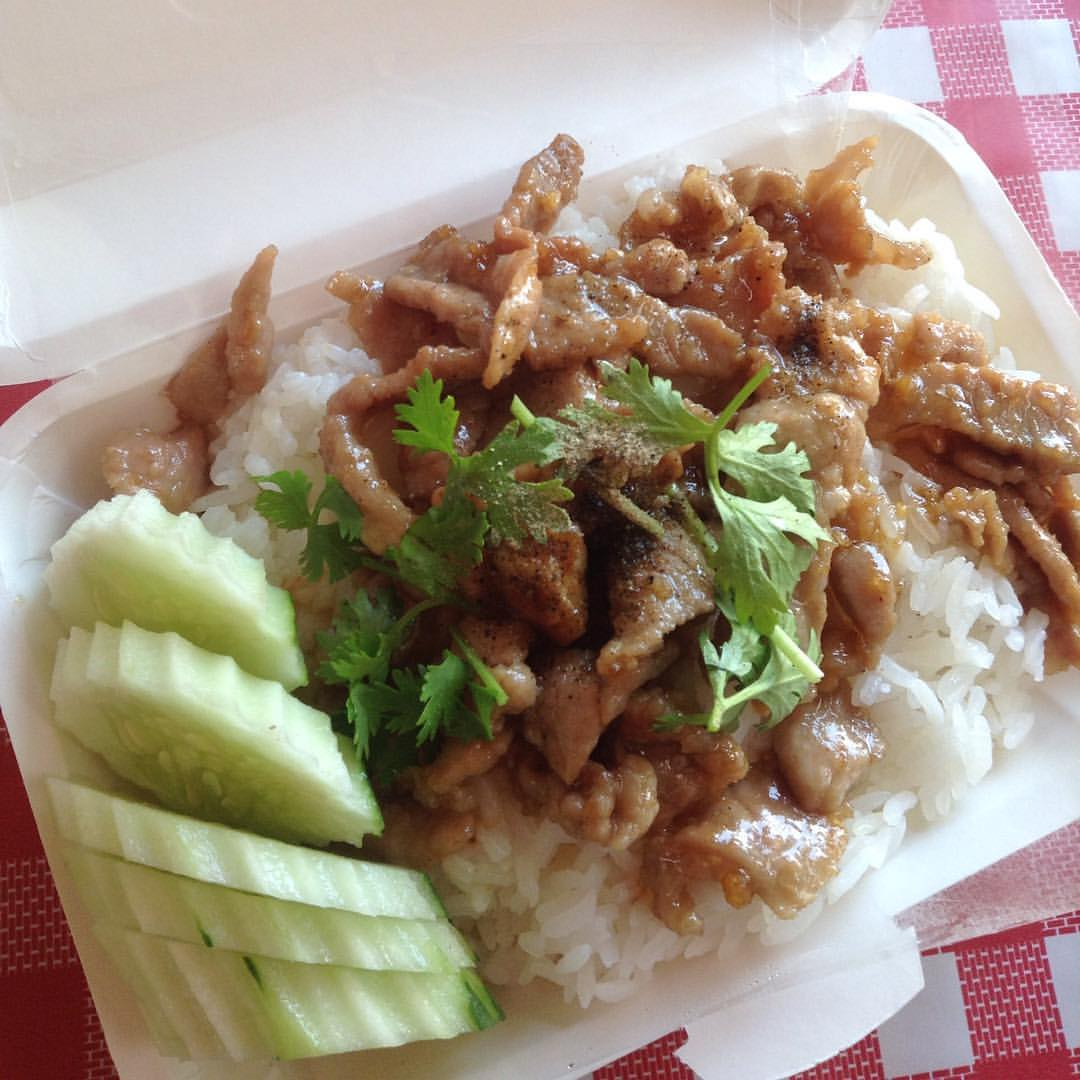

In [2]:
#dir_path = os.getcwd()
dir_path = 'exttestset/008.ข้าวหมูกระเทียมพริกไทย/'

random_filename = random.choice([
    x for x in os.listdir(dir_path)
    if os.path.isfile(os.path.join(dir_path, x)) and os.path.splitext(x)[1]=='.jpg'
])

print(random_filename)
filepath = os.path.join(dir_path, random_filename)
print(filepath)

Image(filename=filepath)

[How to display a random picture from a folder (Python)](https://stackoverflow.com/questions/26467804/how-to-display-a-random-picture-from-a-folder-python)


[How can I display an image from a file in Jupyter Notebook?](https://stackoverflow.com/questions/11854847/how-can-i-display-an-image-from-a-file-in-jupyter-notebook?noredirect=1&lq=1)

In [3]:
data = open(filepath, 'rb').read()
start_time_req = time.time()
resp = requests.post(endpoint,
                     data=data,
                     headers={'Content-Type': 'application/octet-stream', 'Prediction-Key': key})

In [4]:
import re
def beautifyJSON(json_str):
    return re.sub(r'\\u[0-9a-fA-F]{4}', lambda x:eval('"' + x.group() + '"'), 
                  json.dumps(json_str,indent=4))

In [5]:
#print(json.dumps(json.loads(resp.content),indent=4, sort_keys=True))
print(beautifyJSON(resp.json()))

{
    "id": "668290da-e745-4ca6-9605-675dd8eb123d",
    "project": "e96d01c2-e320-48c9-b85e-0fa01890e426",
    "iteration": "bdb4dfa1-4921-41a8-b8ce-e6ac2e916d98",
    "created": "2018-08-29T14:16:39.0854052Z",
    "predictions": [
        {
            "probability": 0.9932593,
            "tagId": "dd4ecad4-3bda-42f4-8e19-d2cef56ce48b",
            "tagName": "008.ข้าวหมูกระเทียมพริกไทย"
        },
        {
            "probability": 0.541157842,
            "tagId": "00c68f22-1d16-4d51-9bef-e99b8daa23d7",
            "tagName": "003.ข้าวขาหมู"
        },
        {
            "probability": 0.3313052,
            "tagId": "35ab6261-ec9e-4de6-a841-ffce08b6866f",
            "tagName": "007.ผัดผักบุ้งไฟแดง"
        },
        {
            "probability": 0.297580838,
            "tagId": "ea88363a-352b-40cd-9301-f8e112eab1ba",
            "tagName": "011.ก๋วยจั๊บน้ำใส"
        },
        {
            "probability": 0.254883528,
            "tagId": "1b2c75b5-238d-4178-8294-97b5d5c20

[How to prettyprint a JSON file?](https://stackoverflow.com/questions/12943819/how-to-prettyprint-a-json-file)

# Part II
Test all images in test set.

## 2.1

In [3]:
MAX_Iterations = 200000


print("Reading input csv with images paths and labels")
filePath = 'ext.csv'
print("file: {0}".format(filePath))
df = pd.read_csv(filePath,header=0)

y_true = []
y_pred = []
y_pred_multi = []

start_time = time.time()
for index, row in df.iterrows():
    if index > MAX_Iterations:
        break
    if index % 10 == 0:
        elapsed_time = time.time() - start_time
        print("processing interation {0}, elapsed time {1}".format(
            index, elapsed_time))
    path = row[0]
    label = row[1]
    resp = None
    try:
        data = open(path, 'rb').read()
        start_time_req = time.time()
        resp = requests.post(endpoint,
                             data=data,
                             headers={'Content-Type': 'application/octet-stream', 'Prediction-Key': key})
        elapsed_time_req = time.time() - start_time
        if index % 10 == 0:
            print("elapsed time  for req # {0} is {1}".format(
                index, elapsed_time_req))
    except Exception as e:
        print("Error opening file or sending request")
        print(e.__doc__)
        print(e.message)
    if resp != None and resp.status_code == requests.codes.ok:
        jsonResponse = resp.json()
        try:
            predictedClass = jsonResponse["predictions"][0]["tagName"]
            predictedProb = jsonResponse["predictions"][0]["probability"]
            y_true.append(label)
            y_pred.append(predictedClass)
            y_pred_multi.append(jsonResponse["predictions"])
        except Exception as e:
            print("Error parsing json response")
            print(e.__doc__)
            print(e.message)
    else:
        print("Got status code {0} for image '{1}' label {2}".format(
            resp.status_code, path, label))


Reading input csv with images paths and labels
file: ext.csv
processing interation 0, elapsed time 0.0011909008026123047
elapsed time  for req # 0 is 4.675339698791504
processing interation 10, elapsed time 28.650245904922485
elapsed time  for req # 10 is 31.410717010498047
processing interation 20, elapsed time 55.55096983909607
elapsed time  for req # 20 is 60.424556732177734
processing interation 30, elapsed time 88.11213397979736
elapsed time  for req # 30 is 90.14153289794922
processing interation 40, elapsed time 116.88371896743774
elapsed time  for req # 40 is 119.26529884338379
processing interation 50, elapsed time 166.72211575508118
elapsed time  for req # 50 is 169.09213972091675
processing interation 60, elapsed time 190.20520877838135
elapsed time  for req # 60 is 196.13085079193115
processing interation 70, elapsed time 222.7154848575592
elapsed time  for req # 70 is 226.26195311546326
processing interation 80, elapsed time 247.8391478061676
elapsed time  for req # 80 is 

elapsed time  for req # 750 is 3135.729991912842
processing interation 760, elapsed time 3179.0003769397736
elapsed time  for req # 760 is 3187.4848368167877
processing interation 770, elapsed time 3244.4651398658752
elapsed time  for req # 770 is 3249.688934803009
processing interation 780, elapsed time 3277.930499792099
elapsed time  for req # 780 is 3280.498169898987
processing interation 790, elapsed time 3308.6193158626556
elapsed time  for req # 790 is 3311.715418815613
processing interation 800, elapsed time 3344.687780857086
elapsed time  for req # 800 is 3348.0333938598633
processing interation 810, elapsed time 3379.612025976181
elapsed time  for req # 810 is 3382.1339910030365
processing interation 820, elapsed time 3413.2156689167023
elapsed time  for req # 820 is 3415.7519178390503
processing interation 830, elapsed time 3444.254946708679
elapsed time  for req # 830 is 3447.2568860054016
processing interation 840, elapsed time 3474.3341619968414
elapsed time  for req # 840

In [1]:
image_path = list(df.loc[:,'image'])

import pickle
with open("iter8_predictions.pickle","wb") as f:
    pickle.dump((image_path, y_true, y_pred, y_pred_multi), f)

NameError: name 'df' is not defined